### DATASET LINK: https://www.kaggle.com/saurabhshahane/twitter-sentiment-dataset

### Importing the require libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

#### Reading our dataset

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\rishabh\Twitter_Data(Sentiment_Analysis).csv')

In [3]:
# Top 5 records

df.head(20)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [27]:
# last 5 records

df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [28]:
# shape of our dataset

df.shape

(162980, 2)

In [29]:
# data types of our dataset

df.dtypes

clean_text     object
category      float64
dtype: object

In [30]:
# information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [31]:
# statistical description of our dataset
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Cheking Null values in our dataset

In [32]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [33]:
# drop all rows which contains null values

df.dropna(inplace=True)

In [34]:
# After cleaning null values checking our shape of data

df.shape

(162969, 2)

In [35]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

#### Now we can observe that there is no nul values in our dataset.

#### So now we can go for further analysis.

In [36]:
# Changing the data type float to integer of the features 'category'

df['category'].astype(int)

0        -1
1         0
2         1
3         1
4         1
         ..
162975   -1
162976   -1
162977    0
162978    0
162979    1
Name: category, Length: 162969, dtype: int32

In [37]:
df.head(50)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


#### Create a dataframe for dependent features(Target variable)

In [38]:
y=df['category'].astype(int)

In [39]:
y

0        -1
1         0
2         1
3         1
4         1
         ..
162975   -1
162976   -1
162977    0
162978    0
162979    1
Name: category, Length: 162969, dtype: int32

In [40]:
y.head()

0   -1
1    0
2    1
3    1
4    1
Name: category, dtype: int32

In [41]:
# count the value of unique one.

y.value_counts()

 1    72249
 0    55211
-1    35509
Name: category, dtype: int64

#### We can see the dataset isn't balance

positive(1)-> 72249 records

neutral(0)-> 55211 records

negetive(-1)-> 35509 records

#### copy our dataframe for the independent features

In [43]:
messages=df.copy()

#### Reset the index in proper way.

In [44]:
messages.reset_index(inplace=True)

#### we reset the index because after cleaning null values index are not properly arrange. so it will be create problems for our further analysis.

In [45]:
messages.head(7)

,index,clean_text,category
0,0,when modi promised “minimum government maximum...,-1.0
1,1,talk all the nonsense and continue all the dra...,0.0
2,2,what did just say vote for modi welcome bjp t...,1.0
3,3,asking his supporters prefix chowkidar their n...,1.0
4,4,answer who among these the most powerful world...,1.0
5,5,kiya tho refresh maarkefir comment karo,0.0
6,6,surat women perform yagna seeks divine grace f...,0.0


#### Here the dataset is follows a proper index

### Data Visualization

#### Word cloud is the only visualization I know for nlp so,lets do it

<function matplotlib.pyplot.show(close=None, block=None)>

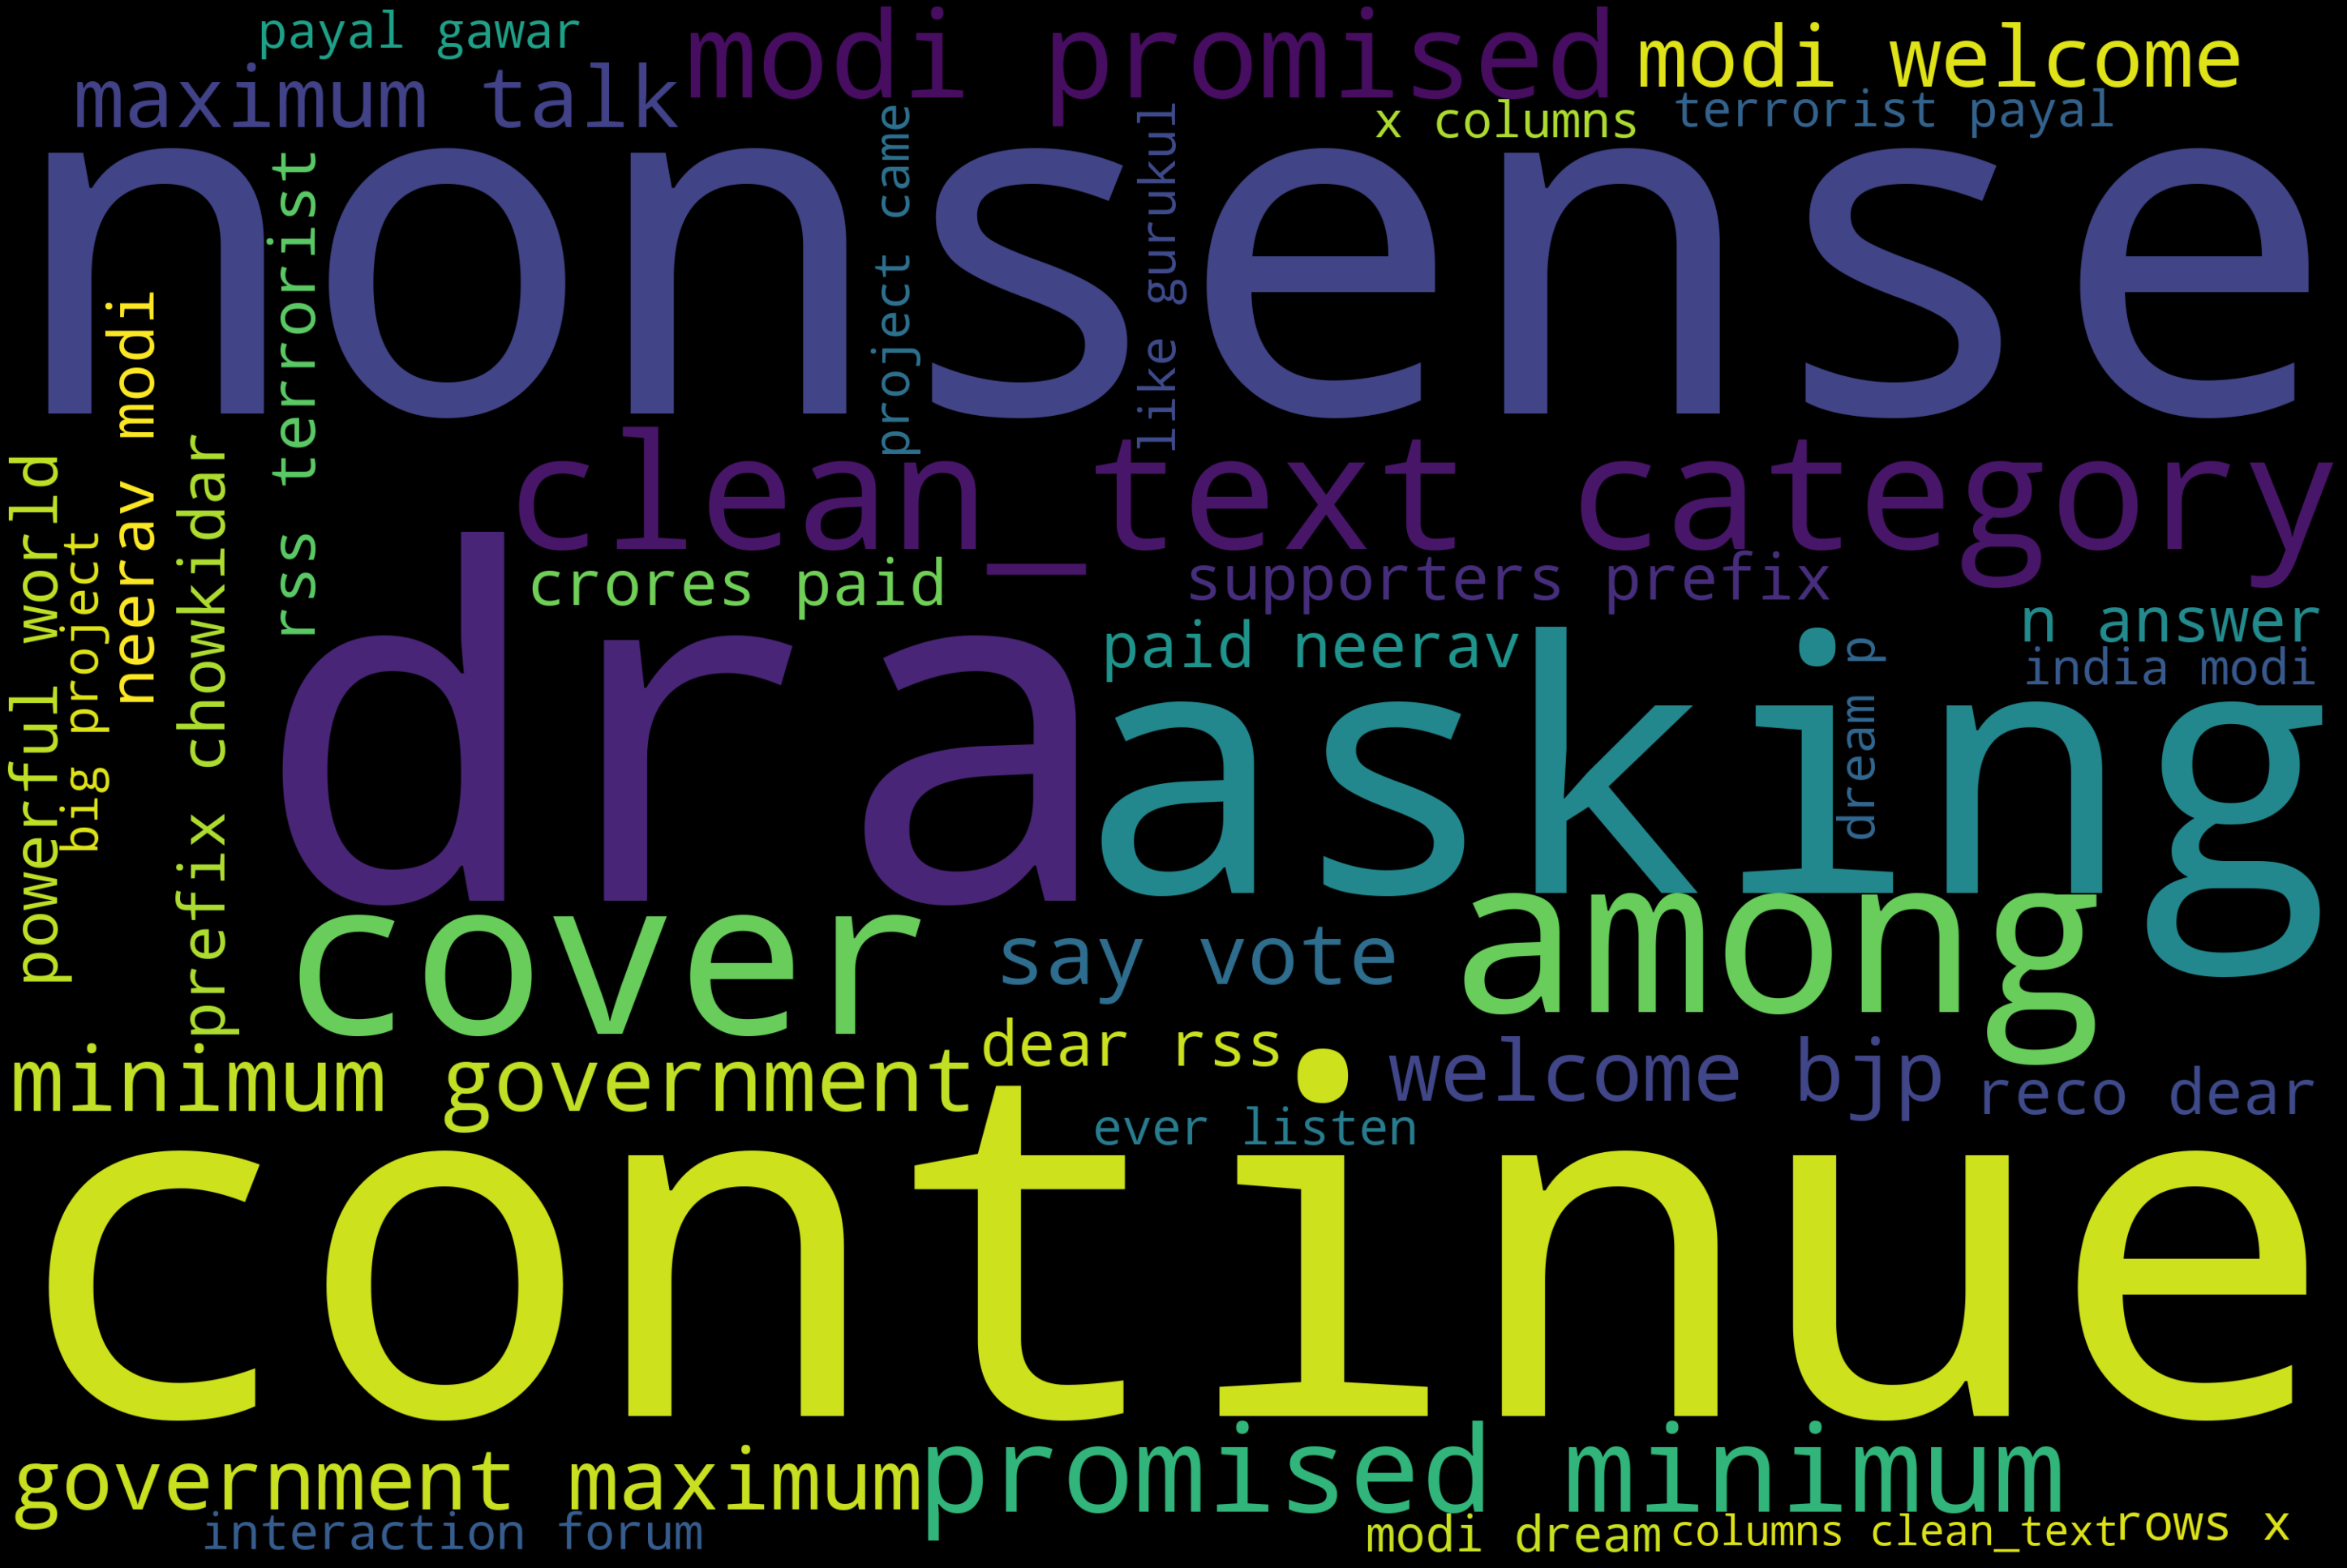

In [47]:
# Positive tweets

text=" "
for tweet in df[df['category']==1.0]['clean_text']:
    text +=f'{df}'

wordcloud=WordCloud(width=3000,height=2000,background_color='black',stopwords=set(nltk.corpus.stopwords.words('english'))).generate(text)

fig=plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

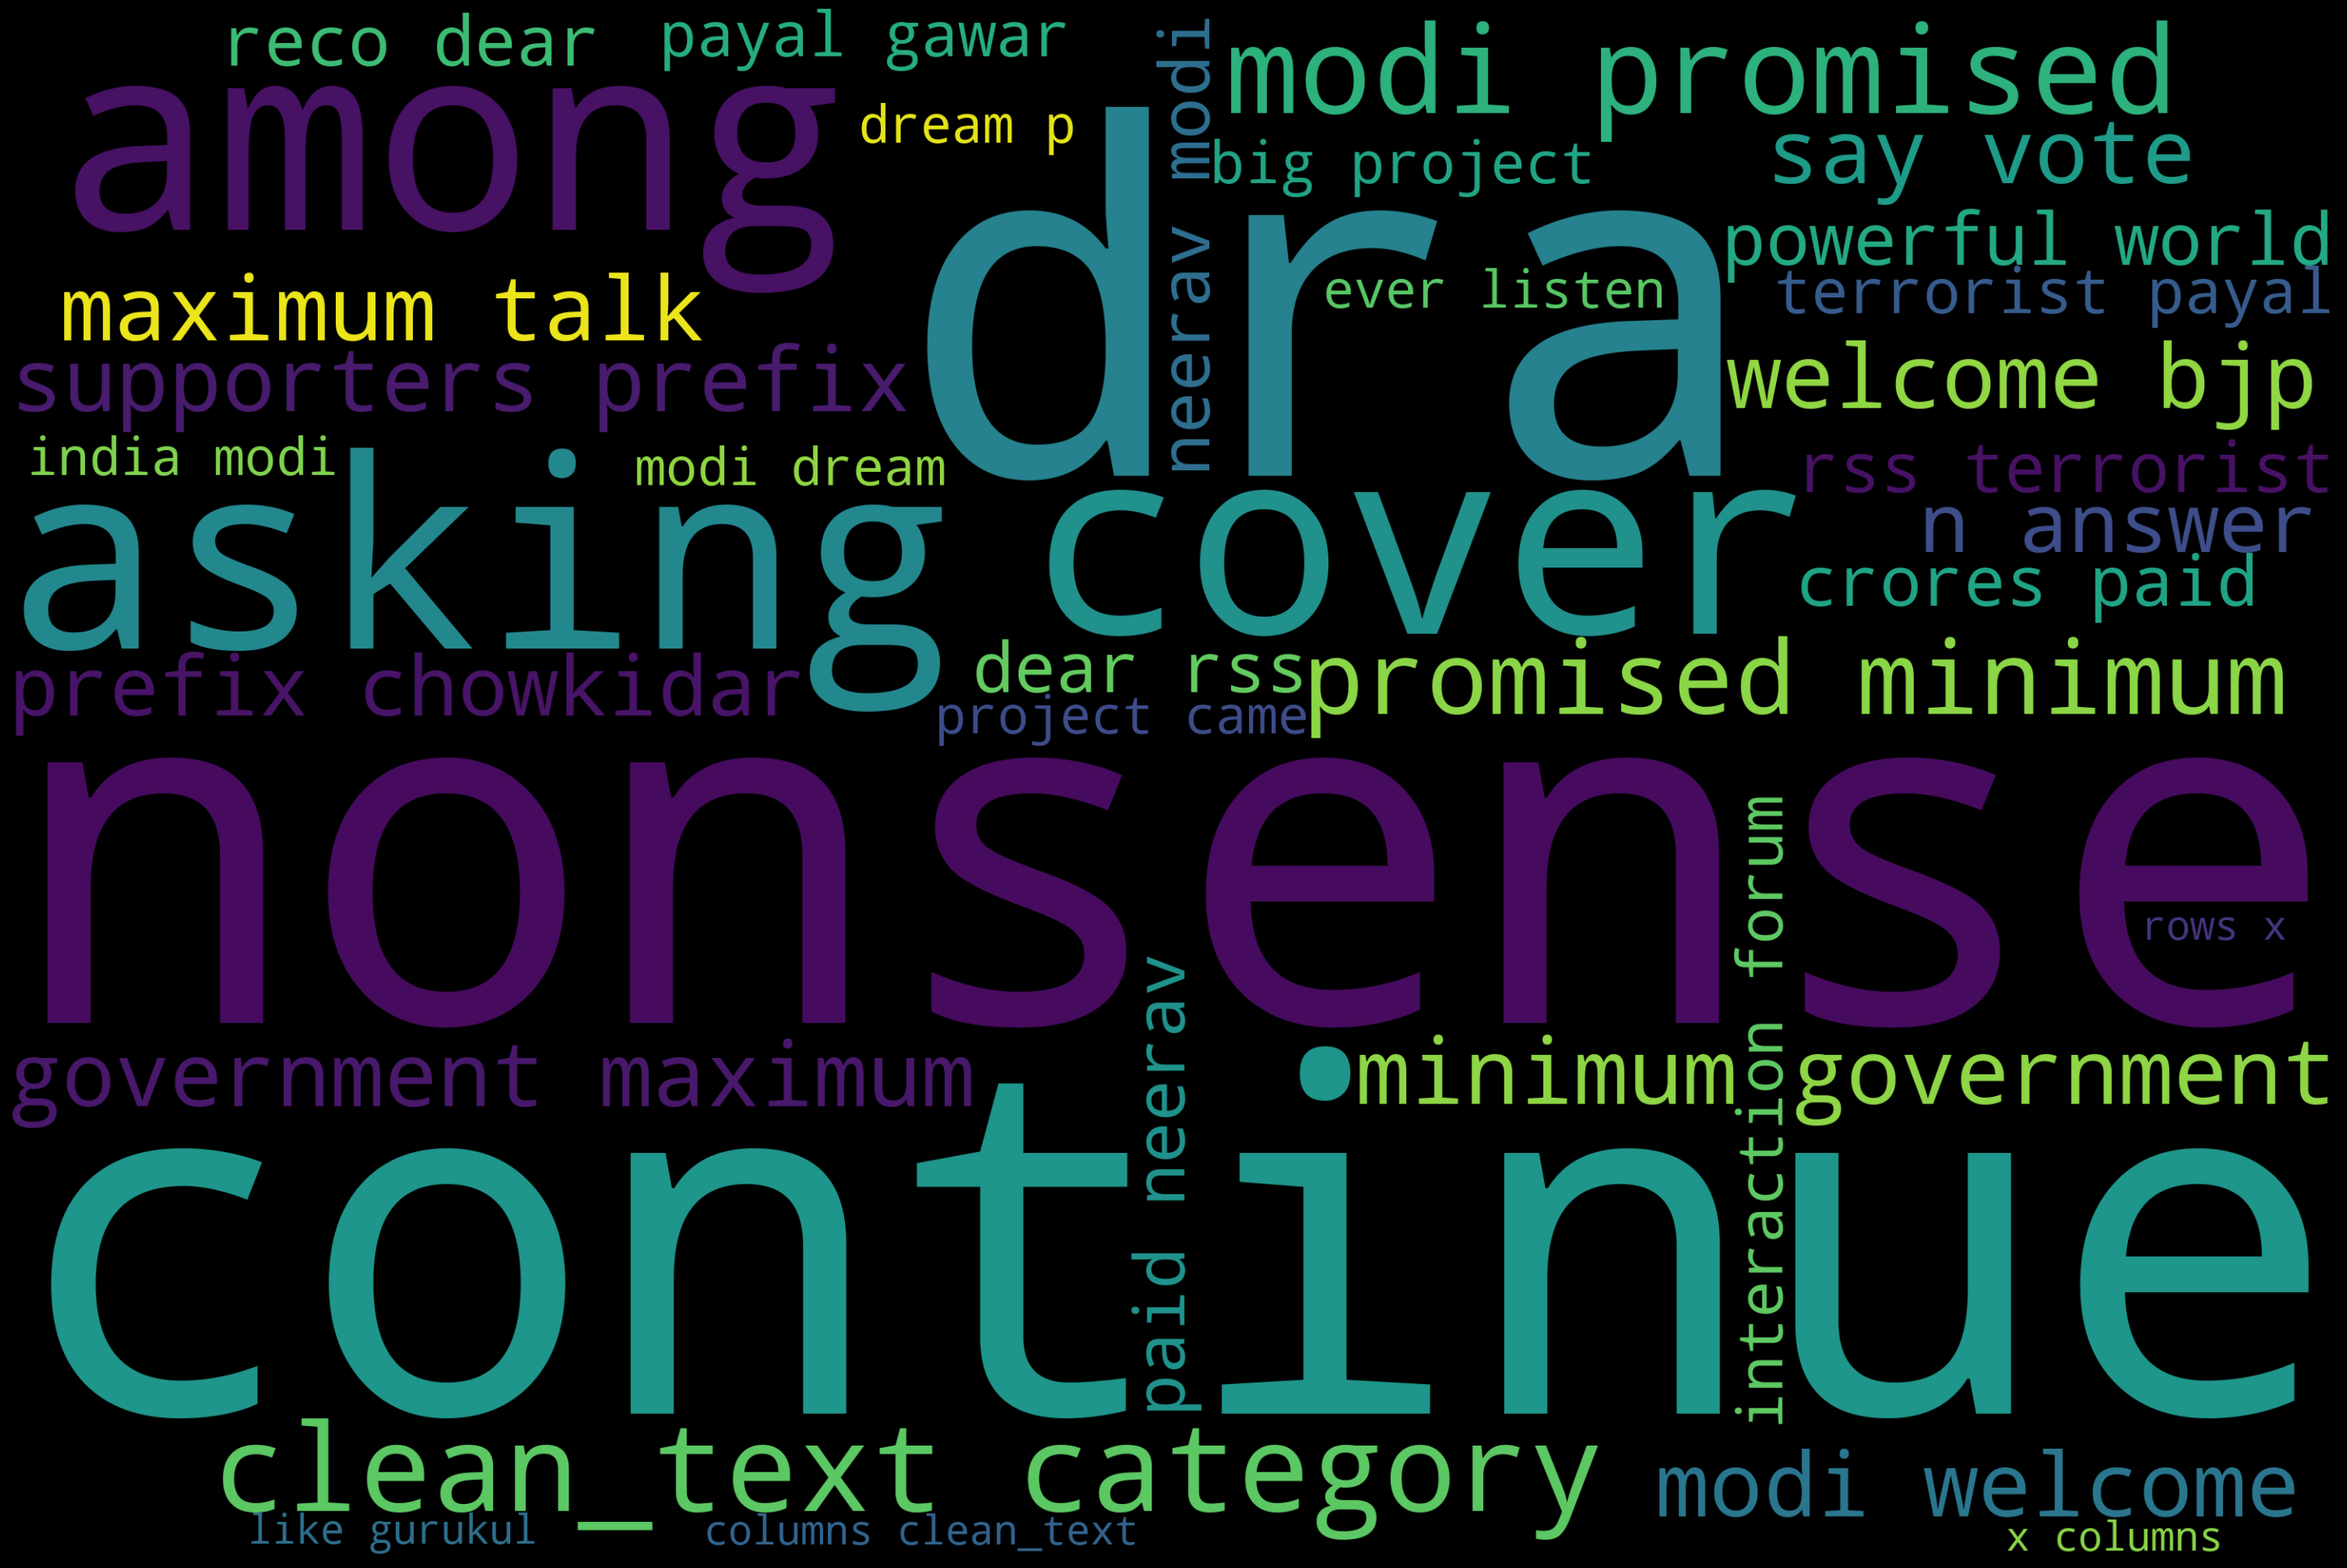

In [48]:
# negative tweets

text = ''

for tweet in df[df['category'] == -1.0 ]['clean_text']:
    text += f" {df}"
    
wordcloud = WordCloud(width=3000, height=2000, background_color='black',stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

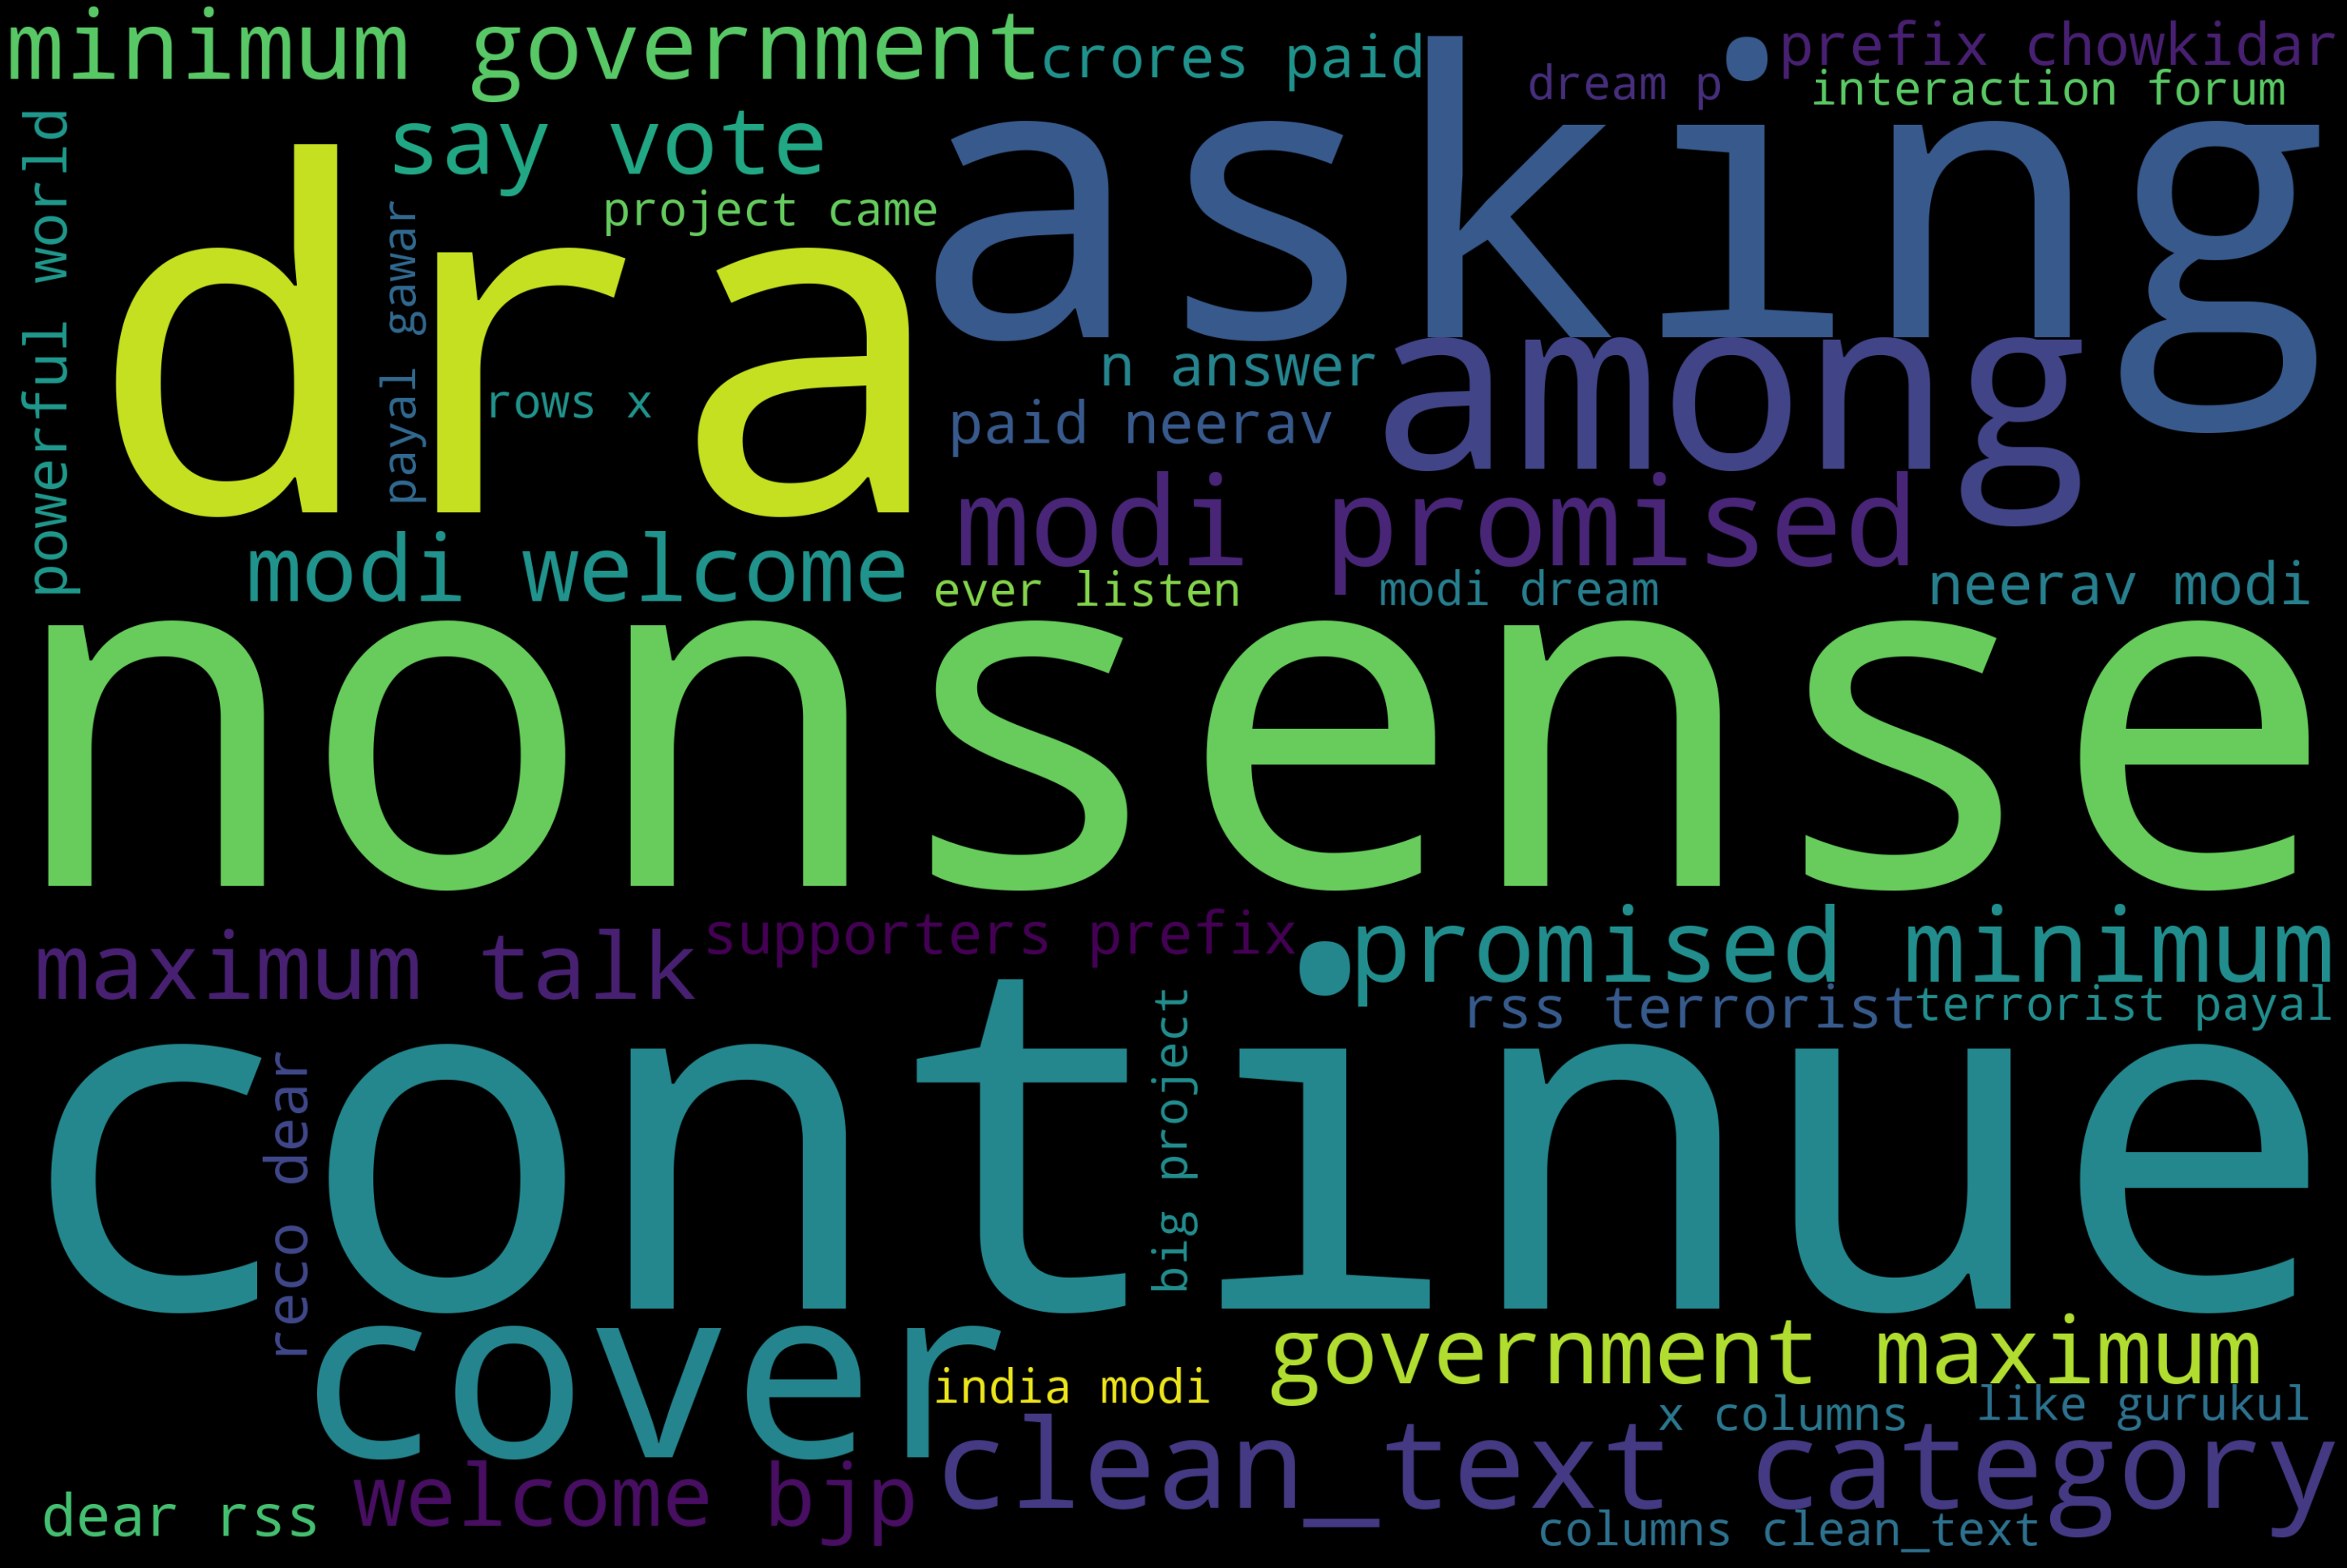

In [49]:
# Neutral tweets

text = ''

for tweet in df[df['category'] == 0.0 ]['clean_text']:
    text += f" {df}"
    
wordcloud = WordCloud(width=3000, height=2000, background_color='black',stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text


### Importing the require library

In [46]:
# importing NLTK library and other require libraries for sentiment analysis
import nltk #library for natural language processing(NLP)

import re  # regular expression(clean the text ,lemmatizing it)

from nltk.corpus import stopwords # this is use for importing stopwords

from nltk.stem import WordNetLemmatizer # this is use for lemmatization operation.

In [50]:
wl=WordNetLemmatizer()
corpus=[] # to store the data after stemming operation

#### Performing lemmatization

In [51]:
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['clean_text'][i])
    review=review.lower()
    review=review.split()
    review=[wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [52]:
corpus

['modi promised minimum government maximum governance expected begin difficult job reforming state take year get justice state business exit psus temple',
 'talk nonsense continue drama vote modi',
 'say vote modi welcome bjp told rahul main campaigner modi think modi relax',
 'asking supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse coming chowkidars',
 'answer among powerful world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat woman perform yagna seek divine grace narendra modi become',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcoming election india saga going important pair look current modi lead govt elected deal brexit combination weekly look juicy bear imho',
 'gandhi gay modi',
 'thing like demonetisation gst good service tax upper caste would sort either view favourably say need give time caste like dalits muslim modi constituency',
 'hope tuthukudi

#### Creating the TF-IDF Model:

We will use Term frequency and inverse document frequency(TF-IDF) instead of bag of words model.Because it will give better accuracy to our analysis model.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=8000)  # reduce some features to overcome model overfitting
x=tv.fit_transform(corpus).toarray()

In [54]:
x.shape

(162969, 8000)

In [55]:
y.shape

(162969,)

#### Train-Test split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

#### Training model using Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import MultinomialNB
analysis_model=MultinomialNB().fit(x_train,y_train)
y_pred=analysis_model.predict(x_test)

### Checking accuracy

#### Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)

In [70]:
print(confusion)

[[1487  311 1668]
 [  86 3533 1888]
 [ 156  385 6783]]


#### Checking accuracy Score

In [71]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [72]:
print("The accuracy of our model is: ",accuracy)

The accuracy of our model is:  0.7242437258391115


#### Classification report

In [73]:
from sklearn.metrics import classification_report

In [74]:
label={'Negative':-1,'Neutral':0,'Positive':1}

In [75]:
print(classification_report(y_test,y_pred,target_names=label.keys(),digits=len(label)))

              precision    recall  f1-score   support

    Negative      0.860     0.429     0.572      3466
     Neutral      0.835     0.642     0.726      5507
    Positive      0.656     0.926     0.768      7324

    accuracy                          0.724     16297
   macro avg      0.784     0.666     0.689     16297
weighted avg      0.760     0.724     0.712     16297



### Conclusion:

1. Accuracy of our model is 72%.
2. The data set is imbalanced.
3. So that the prediction of our dataset vary among the categories. We can see it in classification report.
4. For category:
    Negative: f1 score is very low.(Due to imbalance of data.)
    Neutral & Positive: f1 score is very similar for both of them. The model is best for that part.

#                                                       Thank You 